# Introduction :
# To explore valuable insights into match dynamics, team performances, and various factors affecting IPL Match outcomes.

#### Step 1 : Data Understanding

In [105]:
#importing all the necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("matches.csv")

In [106]:
#Printing the first 5 rows of the dataframe
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

**Understanding the Meaning of each and every column**

**The id column refers to the match ID which is unique for every Match.**  

**The Season column refers to the Year in which the Match is Played.**  

**The City column refers to the city in which the match was played.**  

**The Date Column refers to the exact date the match was played.** 

**The Match Type Column refers to the type of Match that was played**

**The Player of the Match refers to the player that won the pom award for that particular match**

**The Venue Column refers to the ground name where the match was played**

**The Team1 Column refers to the home team name**

**The Team2 Column refers to the opposition team name**

**The Toss Winner Column refers to the Winner of the Toss in that game**

**The Toss Decision Column refers to the Decision of the toss in that game**

**The Winner Column refers to the team that won that particular game**

**The Result Column refers to the type of Win in that Game ie, by runs or by wickets**

**The Result Margin Column refers to the Margin of Winning either by runs or by number of wickets**

**The Target Runs Column refers to the Number of runs target set by the team that batted first**

**The Target Overs Column refers to the maximum number of overs in which the chasing team should chase down the target**

**The Super Over Column refers to either super over was played or not in that particular match**

**The Method Column refers to either the match was won by normal method or by DLS Method**

**The Umpire1 Column refers to the first umpire officiating that particular match**

**The Umpire2 Column refers to the second umpire officiating that particular match**


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [109]:
df.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


**Since Match ID is just for unique value for each match, we would be neglecting the statistics related to Match ID**

**Since the result margin is dependent on result type, we would be neglecting the statistics related to result margin(In this step only)**



# Key Insights

**The Average Score by the Batting First Teams in the IPL is approximately 166 runs**

**The Lowest Score by the Batting First Teams in the IPL is 43 Runs**

**In 75% of the Matches, the Team Batting First has set a target of less than 188 runs**

**About 50% of the Matches, the Team Batting First has set a target of less than 167 runs**

**In just 25% of the Matches, the Team Batting First has scored more than 187 runs**

In [110]:
df.target_overs.quantile(0.02)

np.float64(14.82)

**Approximately 2% of all the IPL Matches Played have been played less than 15 overs in the 2nd innings**



#### Step 2 : Data Cleaning

In [111]:
df.isna().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [112]:
#Replacing the null values of result_margin with median value
df['result_margin'] = df['result_margin'].fillna(df['result_margin'].median());

In [113]:
#Replacing the null values of winner column with mode value
df['winner'] = df['winner'].fillna(df['winner'].mode)

In [114]:
df.isna().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                0
result                0
result_margin         0
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [115]:
#Deleting all the rows where player_of_match is null
df.dropna(subset=['player_of_match'], inplace=True)

In [116]:
#Dropping the rows where city is null
df.dropna(subset=['city'],inplace=True)

In [117]:
#Replacing NaN Values of Method Column with "Normal"
df['method'] = df['method'].fillna("Normal")

In [118]:
#Final Cleaned Data
df.isna().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64

In [119]:
df.shape

(1039, 20)

In [120]:
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Normal,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,Normal,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,Normal,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,Normal,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,Normal,BF Bowden,K Hariharan


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1039 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1039 non-null   int64  
 1   season           1039 non-null   object 
 2   city             1039 non-null   object 
 3   date             1039 non-null   object 
 4   match_type       1039 non-null   object 
 5   player_of_match  1039 non-null   object 
 6   venue            1039 non-null   object 
 7   team1            1039 non-null   object 
 8   team2            1039 non-null   object 
 9   toss_winner      1039 non-null   object 
 10  toss_decision    1039 non-null   object 
 11  winner           1039 non-null   object 
 12  result           1039 non-null   object 
 13  result_margin    1039 non-null   float64
 14  target_runs      1039 non-null   float64
 15  target_overs     1039 non-null   float64
 16  super_over       1039 non-null   object 
 17  method           10

In [122]:
#Converting the date column to date dtype
df['date'] = pd.to_datetime(df['date'],errors='coerce')

In [123]:
#Convert the result_margin column to int type as match result cannot be in points
df['result_margin'] = df['result_margin'].astype(int)

In [124]:
#Convert the target runs column to int type as runs cannot be in points
df['target_runs'] = df['target_runs'].astype(int)

In [129]:
df['super_over'] = df['super_over'].replace("N","No")
df['super_over'] = df['super_over'].replace("Y","Yes")

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1039 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1039 non-null   int64         
 1   season           1039 non-null   object        
 2   city             1039 non-null   object        
 3   date             1039 non-null   datetime64[ns]
 4   match_type       1039 non-null   object        
 5   player_of_match  1039 non-null   object        
 6   venue            1039 non-null   object        
 7   team1            1039 non-null   object        
 8   team2            1039 non-null   object        
 9   toss_winner      1039 non-null   object        
 10  toss_decision    1039 non-null   object        
 11  winner           1039 non-null   object        
 12  result           1039 non-null   object        
 13  result_margin    1039 non-null   int64         
 14  target_runs      1039 non-null   int64       

#### Step 3 : Feature Engineering

In [133]:
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140,223,20.0,No,Normal,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,241,20.0,No,Normal,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9,130,20.0,No,Normal,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5,166,20.0,No,Normal,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5,111,20.0,No,Normal,BF Bowden,K Hariharan


In [136]:
#Creating 3 seperate columns "Year","Month",and "Date"
df['Year'] = df['date'].dt.year

In [137]:
df['Month'] = df['date'].dt.month

In [138]:
df['Day'] = df['date'].dt.day

In [142]:
pd.set_option('display.max_columns', None)
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140,223,20.0,No,Normal,Asad Rauf,RE Koertzen,2008,4,18
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,241,20.0,No,Normal,MR Benson,SL Shastri,2008,4,19
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9,130,20.0,No,Normal,Aleem Dar,GA Pratapkumar,2008,4,19
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5,166,20.0,No,Normal,SJ Davis,DJ Harper,2008,4,20
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5,111,20.0,No,Normal,BF Bowden,K Hariharan,2008,4,20


In [147]:
#Removing date column
df = df.drop(columns = ['date'])

In [152]:
#Creating a column named "Home Team Outcome" which indicates whether the home team has won the match or not
df['Home_Team_Outcome'] = np.where(df['team1'] == df['winner'],"Win","Loss")

In [153]:
df.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome
0,335982,2007/08,Bangalore,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140,223,20.0,No,Normal,Asad Rauf,RE Koertzen,2008,4,18,Loss
1,335983,2007/08,Chandigarh,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,241,20.0,No,Normal,MR Benson,SL Shastri,2008,4,19,Loss
2,335984,2007/08,Delhi,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9,130,20.0,No,Normal,Aleem Dar,GA Pratapkumar,2008,4,19,Win
3,335985,2007/08,Mumbai,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5,166,20.0,No,Normal,SJ Davis,DJ Harper,2008,4,20,Loss
4,335986,2007/08,Kolkata,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5,111,20.0,No,Normal,BF Bowden,K Hariharan,2008,4,20,Win


In [154]:
#Creating a column named "Away Team Outcome" which indicates whether the away team has won the match or not
df['Away_Team_Outcome'] = np.where(df['Home_Team_Outcome'] == "Win","Loss","Win")

In [155]:
df.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome,Away_Team_Outcome
0,335982,2007/08,Bangalore,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140,223,20.0,No,Normal,Asad Rauf,RE Koertzen,2008,4,18,Loss,Win
1,335983,2007/08,Chandigarh,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,241,20.0,No,Normal,MR Benson,SL Shastri,2008,4,19,Loss,Win
2,335984,2007/08,Delhi,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9,130,20.0,No,Normal,Aleem Dar,GA Pratapkumar,2008,4,19,Win,Loss
3,335985,2007/08,Mumbai,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5,166,20.0,No,Normal,SJ Davis,DJ Harper,2008,4,20,Loss,Win
4,335986,2007/08,Kolkata,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5,111,20.0,No,Normal,BF Bowden,K Hariharan,2008,4,20,Win,Loss


In [159]:
#Creating a column named "Full_Match" which indicates whether the match played was full or was it a shortned match
df['Full_Match'] = np.where(df['method'] == "Normal","Full","Shortned")

#### Step 4 : Data Analsysis

***1) Overall Match Analaysis***

**Analyze the distribution of match results and trends over the years.**

**Seasonal Performance**

In [214]:
team_performance_overall = df.groupby(['season', 'winner']).size().reset_index(name='wins')
team_performance_overall

,season,winner,wins
0,2007/08,Chennai Super Kings,9
1,2007/08,Deccan Chargers,2
2,2007/08,Delhi Daredevils,7
3,2007/08,Kings XI Punjab,10
4,2007/08,Kolkata Knight Riders,6
...,...,...,...
139,2024,Mumbai Indians,4
140,2024,Punjab Kings,5
141,2024,Rajasthan Royals,9
142,2024,Royal Challengers Bengaluru,7


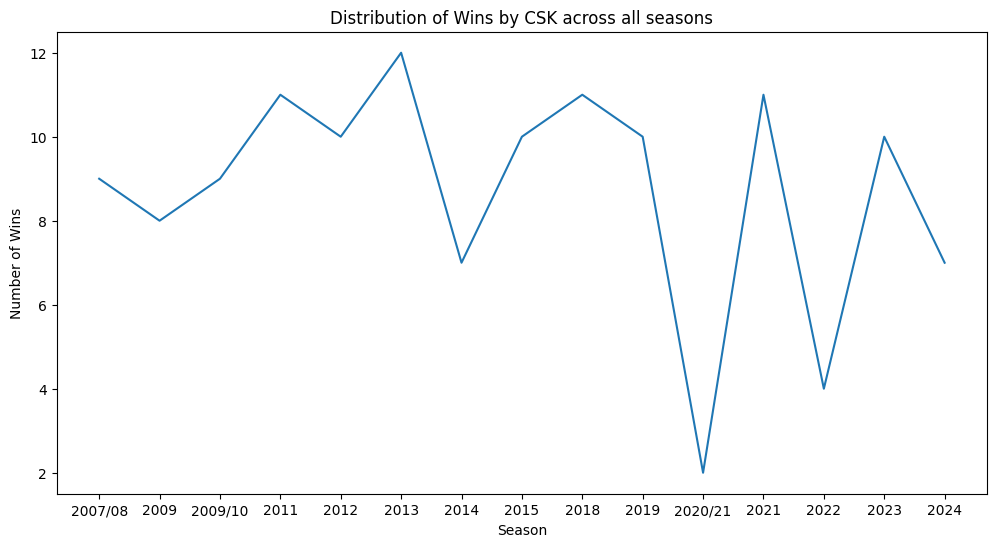

In [260]:
csk_performance = team_performance_overall[team_performance_overall['winner'] == 'Chennai Super Kings'][['winner','season', 'wins']]
plt.figure(figsize=(12,6))
plt.plot(csk_performance['season'],csk_performance['wins'])
plt.title("Distribution of Wins by CSK across all seasons")
plt.xlabel("Season")
plt.ylabel("Number of Wins")
plt.show()

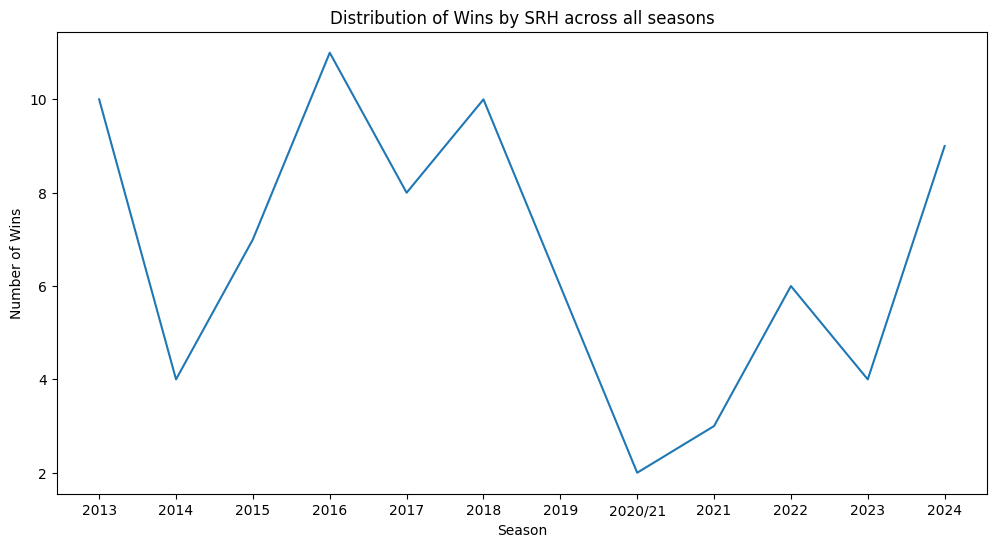

In [262]:
srh_performance = team_performance_overall[team_performance_overall['winner'] == 'Sunrisers Hyderabad'][['winner','season', 'wins']]
plt.figure(figsize=(12,6))
plt.plot(srh_performance['season'],srh_performance['wins'])
plt.title("Distribution of Wins by SRH across all seasons")
plt.xlabel("Season")
plt.ylabel("Number of Wins")
plt.show()

In [263]:
team_performance_overall['winner'].unique()

array(['Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredevils',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Mumbai Indians',
       'Rajasthan Royals', 'Royal Challengers Bangalore',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

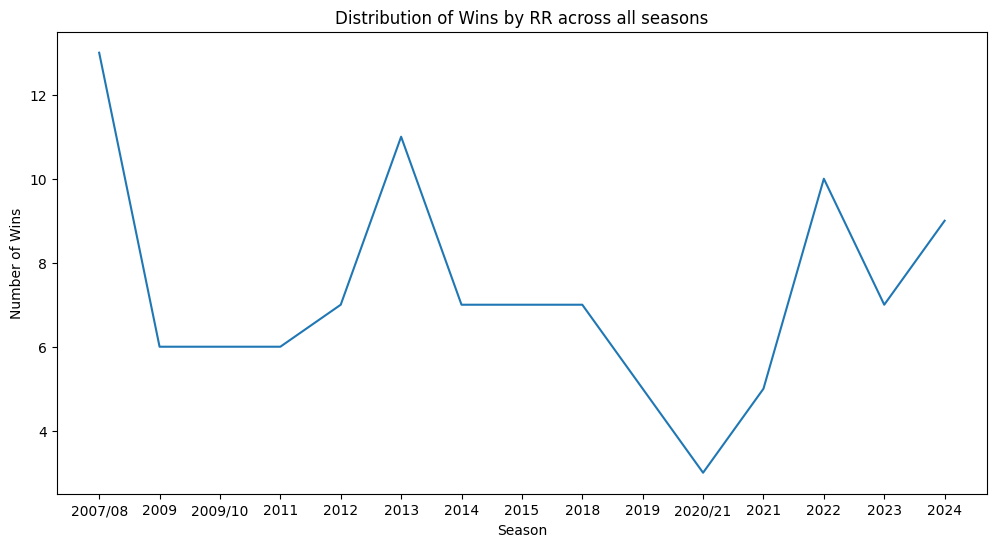

In [264]:
rr_performance = team_performance_overall[team_performance_overall['winner'] == 'Rajasthan Royals'][['winner','season', 'wins']]
plt.figure(figsize=(12,6))
plt.plot(rr_performance['season'],rr_performance['wins'])
plt.title("Distribution of Wins by RR across all seasons")
plt.xlabel("Season")
plt.ylabel("Number of Wins")
plt.show()

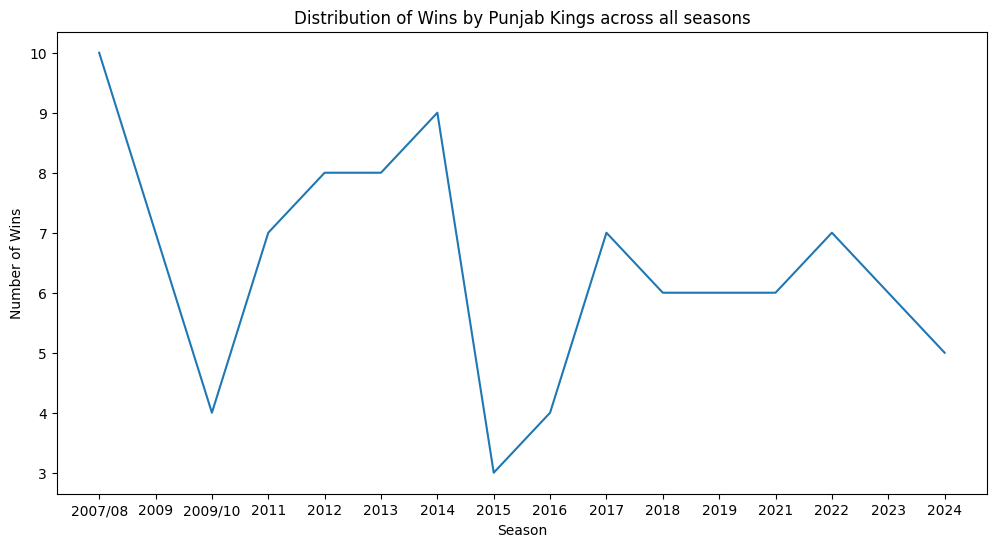

In [273]:
kx1p_performance = team_performance_overall[
    (team_performance_overall['winner'] == 'Kings XI Punjab') | 
    (team_performance_overall['winner'] == 'Punjab Kings')
][['winner','season', 'wins']]

plt.figure(figsize=(12,6))
plt.plot(kx1p_performance['season'], kx1p_performance['wins'])  # Added markers for clarity
plt.title("Distribution of Wins by Punjab Kings across all seasons")  # Fixed closing bracket issue
plt.xlabel("Season")
plt.ylabel("Number of Wins")
plt.show()


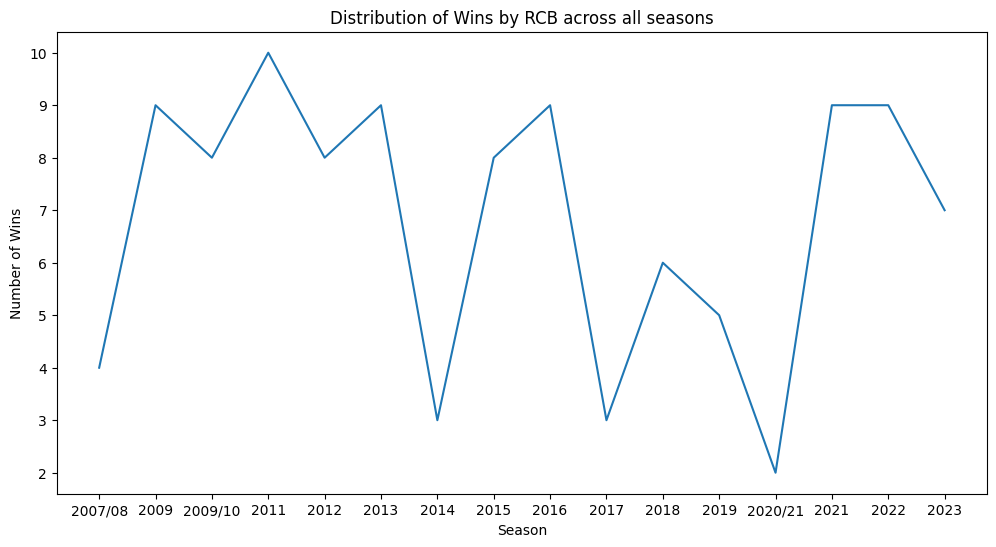

In [275]:
rcb_performance = team_performance_overall[
    (team_performance_overall['winner'] == 'Royal Challengers Bangalore')][['winner','season', 'wins']]

plt.figure(figsize=(12,6))
plt.plot(rcb_performance['season'], rcb_performance['wins'])  # Added markers for clarity
plt.title("Distribution of Wins by RCB across all seasons")  # Fixed closing bracket issue
plt.xlabel("Season")
plt.ylabel("Number of Wins")
plt.show()


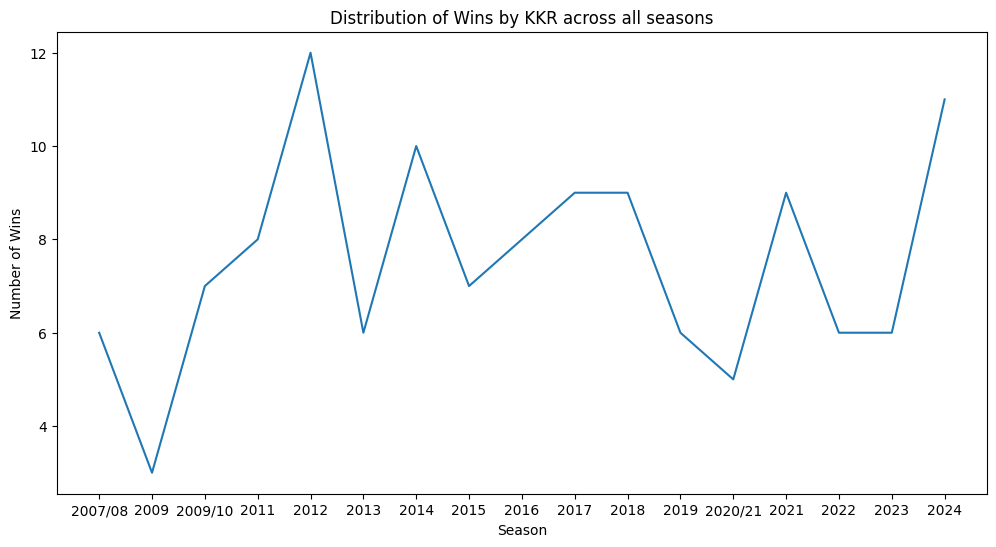

In [277]:
kkr_performance = team_performance_overall[
    (team_performance_overall['winner'] == 'Kolkata Knight Riders')][['winner','season', 'wins']]

plt.figure(figsize=(12,6))
plt.plot(kkr_performance['season'], kkr_performance['wins'])  # Added markers for clarity
plt.title("Distribution of Wins by KKR across all seasons")  # Fixed closing bracket issue
plt.xlabel("Season")
plt.ylabel("Number of Wins")
plt.show()


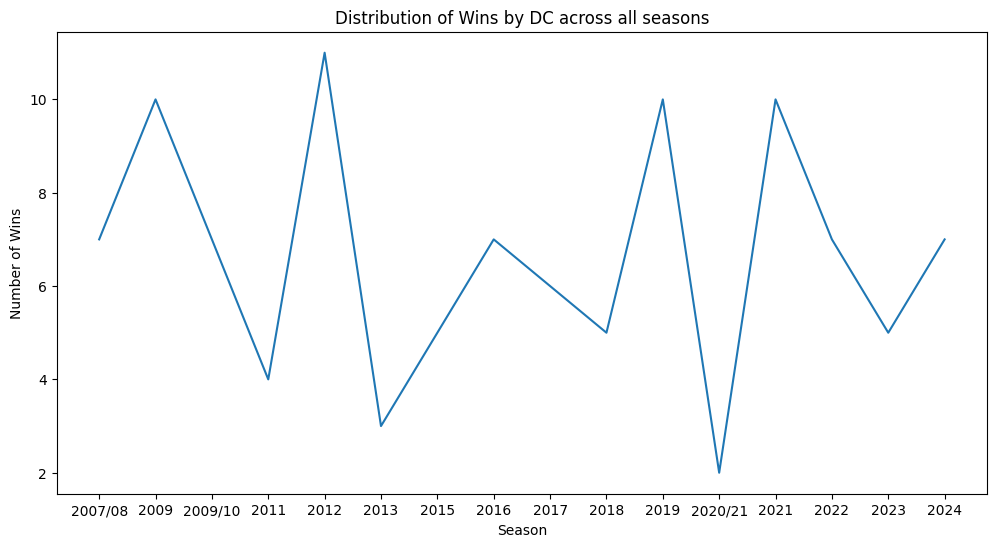

In [280]:
dc_performance = team_performance_overall[
    (team_performance_overall['winner'] == 'Delhi Daredevils') | (team_performance_overall['winner'] == 'Delhi Capitals')][['winner','season', 'wins']]

plt.figure(figsize=(12,6))
plt.plot(dc_performance['season'], dc_performance['wins'])  # Added markers for clarity
plt.title("Distribution of Wins by DC across all seasons")  # Fixed closing bracket issue
plt.xlabel("Season")
plt.ylabel("Number of Wins")
plt.show()


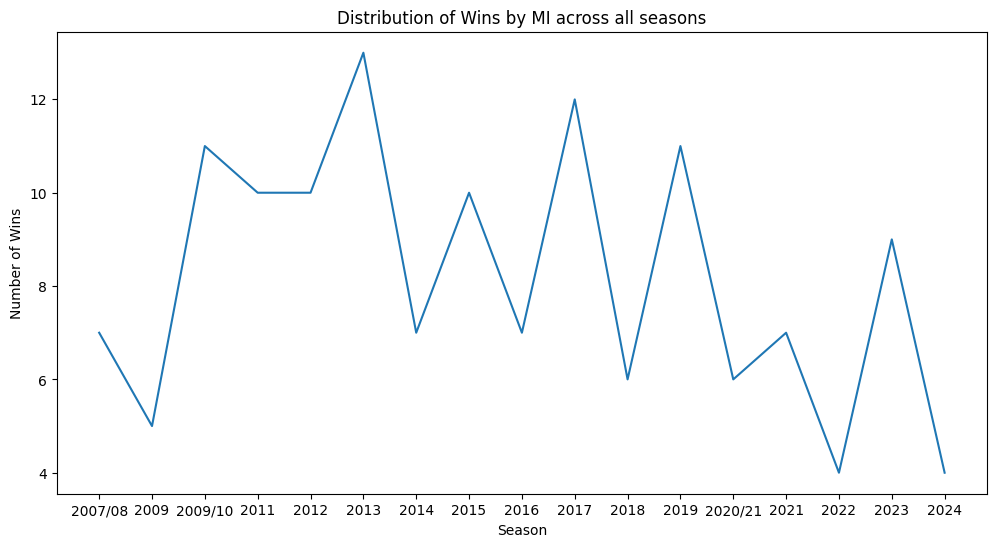

In [281]:
mi_performance = team_performance_overall[
    (team_performance_overall['winner'] == 'Mumbai Indians')][['winner','season', 'wins']]

plt.figure(figsize=(12,6))
plt.plot(mi_performance['season'], mi_performance['wins'])  # Added markers for clarity
plt.title("Distribution of Wins by MI across all seasons")  # Fixed closing bracket issue
plt.xlabel("Season")
plt.ylabel("Number of Wins")
plt.show()


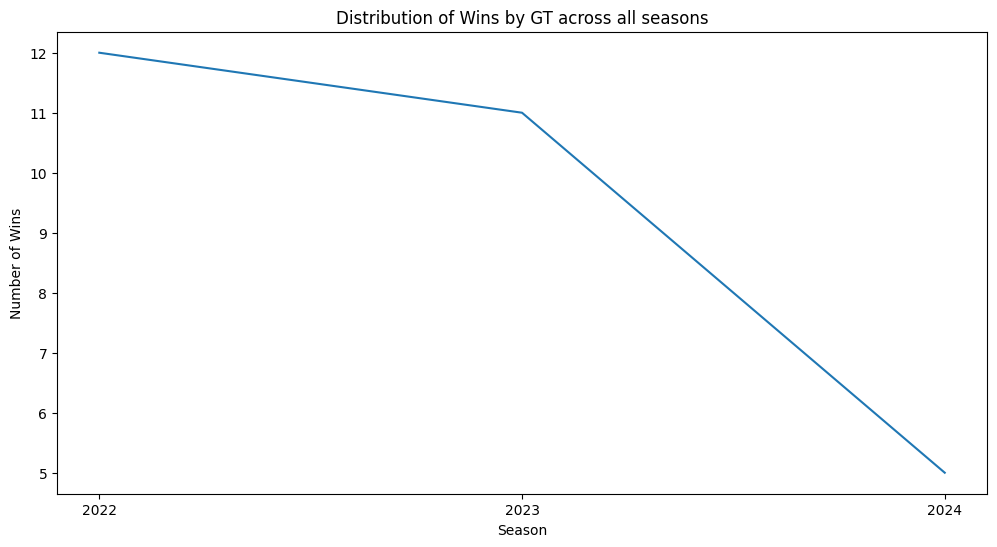

In [282]:
gt_performance = team_performance_overall[
    (team_performance_overall['winner'] == 'Gujarat Titans')][['winner','season', 'wins']]

plt.figure(figsize=(12,6))
plt.plot(gt_performance['season'], gt_performance['wins'])  # Added markers for clarity
plt.title("Distribution of Wins by GT across all seasons")  # Fixed closing bracket issue
plt.xlabel("Season")
plt.ylabel("Number of Wins")
plt.show()


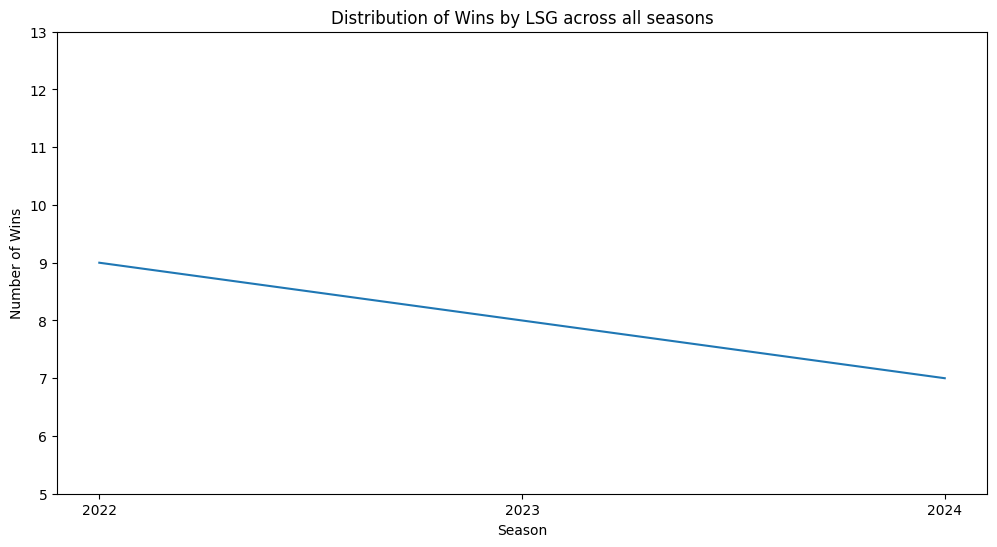

In [288]:
lsg_performance = team_performance_overall[
    (team_performance_overall['winner'] == 'Lucknow Super Giants')][['winner','season', 'wins']]

plt.figure(figsize=(12,6))
plt.plot(lsg_performance['season'], lsg_performance['wins'])  # Added markers for clarity
plt.title("Distribution of Wins by LSG across all seasons")  # Fixed closing bracket issue
plt.xlabel("Season")
plt.yticks(range(5,14,1))
plt.ylabel("Number of Wins")
plt.show()


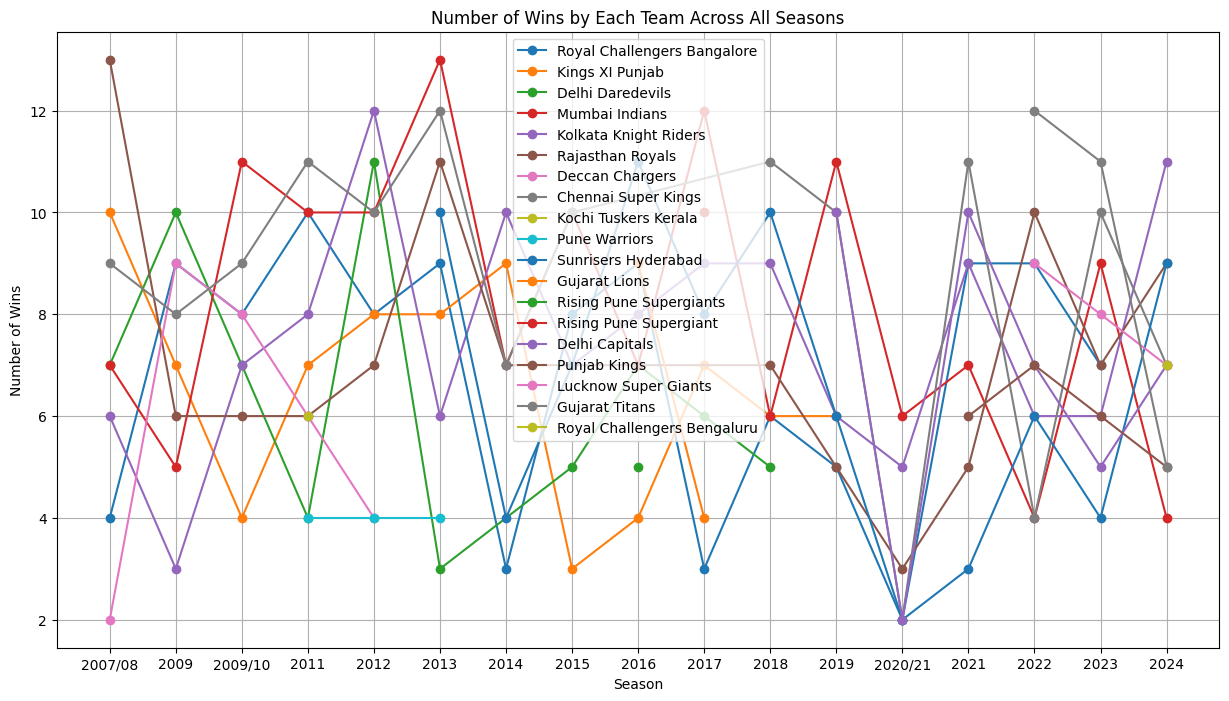

In [289]:
plt.figure(figsize=(15, 8))  # Adjusted size for better visibility

for team in teams:
    team_performance = team_performance_overall[
        team_performance_overall['winner'] == team
    ][['season', 'wins']]
    
    plt.plot(team_performance['season'], team_performance['wins'], marker='o', label=team)

plt.title("Number of Wins by Each Team Across All Seasons")
plt.xlabel("Season")
plt.ylabel("Number of Wins")
plt.legend()  # Show team labels
plt.grid(True)  # Improves readability
plt.show()


***Match Type Trends***

In [290]:
df.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Year,Month,Day,Home_Team_Outcome,Away_Team_Outcome,Full_Match
0,335982,2007/08,Bangalore,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140,223,20.0,No,Normal,Asad Rauf,RE Koertzen,2008,4,18,Loss,Win,Full
1,335983,2007/08,Chandigarh,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,241,20.0,No,Normal,MR Benson,SL Shastri,2008,4,19,Loss,Win,Full
2,335984,2007/08,Delhi,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9,130,20.0,No,Normal,Aleem Dar,GA Pratapkumar,2008,4,19,Win,Loss,Full
3,335985,2007/08,Mumbai,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5,166,20.0,No,Normal,SJ Davis,DJ Harper,2008,4,20,Loss,Win,Full
4,335986,2007/08,Kolkata,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5,111,20.0,No,Normal,BF Bowden,K Hariharan,2008,4,20,Win,Loss,Full


In [292]:
team_performance_overall = df.groupby(['season', 'winner']).size().reset_index(name='wins')


In [302]:
playoff_matches = df[df['match_type'] != "League"]

team_wins_in_playoffs = playoff_matches.groupby(['winner']).size()


team_playoff_counts = pd.concat([playoff_matches['team1'], playoff_matches['team2']]).value_counts()

team_playoff_counts


Chennai Super Kings            26
Mumbai Indians                 18
Royal Challengers Bangalore    15
Kolkata Knight Riders          15
Sunrisers Hyderabad            14
Rajasthan Royals               11
Delhi Capitals                  5
Gujarat Titans                  5
Delhi Daredevils                4
Kings XI Punjab                 4
Deccan Chargers                 4
Gujarat Lions                   2
Rising Pune Supergiant          2
Lucknow Super Giants            2
Royal Challengers Bengaluru     1
Name: count, dtype: int64

In [303]:
team_wins_in_playoffs

winner
Chennai Super Kings            17
Deccan Chargers                 2
Delhi Capitals                  2
Gujarat Titans                  3
Kings XI Punjab                 1
Kolkata Knight Riders          10
Mumbai Indians                 11
Rajasthan Royals                5
Rising Pune Supergiant          1
Royal Challengers Bangalore     6
Sunrisers Hyderabad             6
dtype: int64

In [309]:
win_percentage_in_playoffs = ( team_wins_in_playoffs / team_playoff_counts ) * 100
win_percentage_in_playoffs = win_percentage_in_playoffs.dropna()

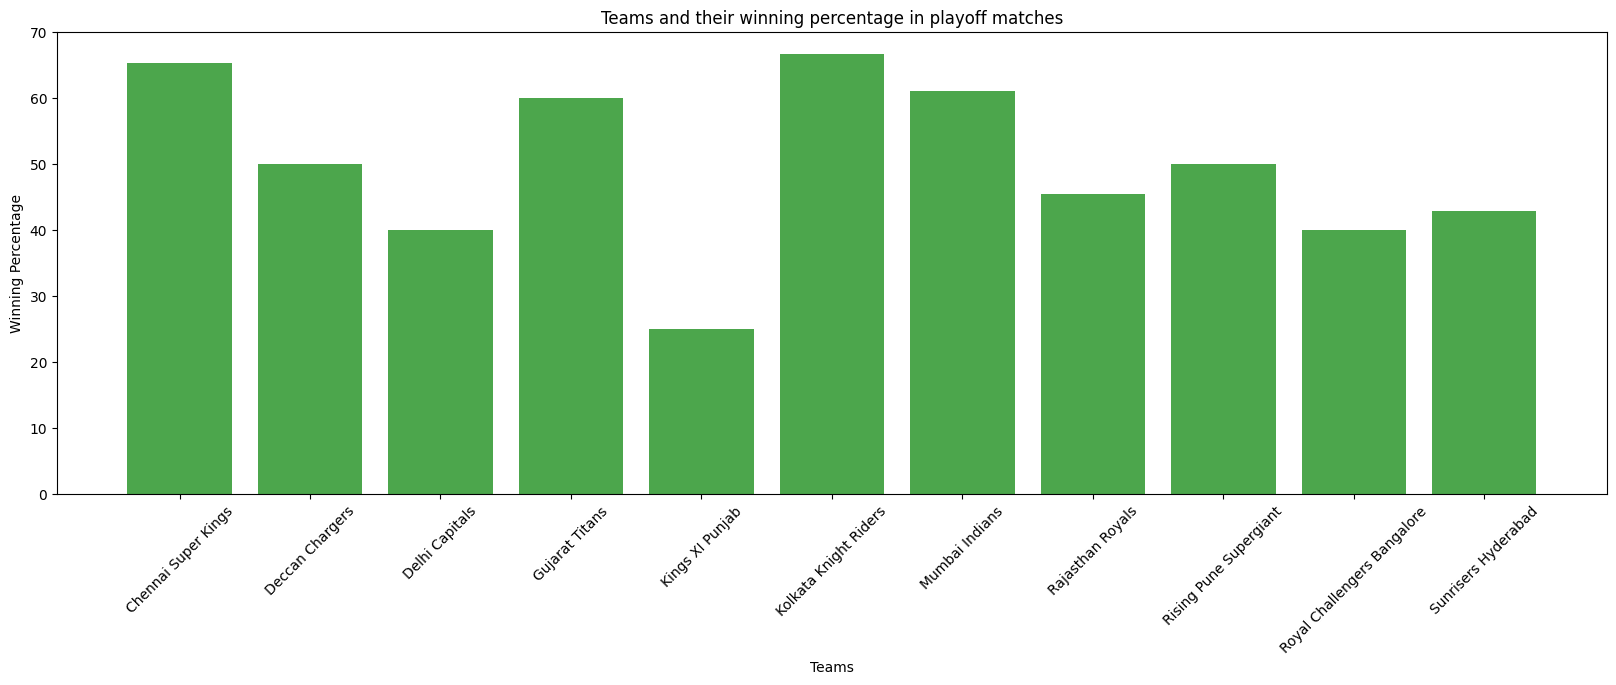

In [343]:
plt.figure(figsize = (20,6))
plt.bar(win_percentage_in_playoffs.index,win_percentage_in_playoffs.values,alpha = 0.7,color = "green")
plt.xticks(rotation=45)
plt.xlabel("Teams")
plt.ylabel("Winning Percentage")
plt.title("Teams and their winning percentage in playoff matches")
plt.show()